# Red Profunda Perceptrón Multicapa
## Imports Necesarios

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
#from pyimagesearch import models

Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

## Cargar archivo de Entradas

In [10]:
#cargamos los datos de entrada
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)
#veamos cuantas dimensiones y registros contiene
#data.shape

In [11]:
# Ver los 1ros registros
data.head()

,ws,wp1t-44,wp1t-43,wp1t-42,wp1t-41,wp1t-40,wp1t-39,wp1t-38,wp1t-37,wp1t-36,...,wp1t-9,wp1t-8,wp1t-7,wp1t-6,wp1t-5,wp1t-4,wp1t-3,wp1t-2,wp1t-1,wp1
100,0.81,0.035,0.005,0.000,0.000,0.010,0.025,0.03,0.01,0.00,...,0.01,0.01,0.010,0.010,0.010,0.080,0.025,0.08,0.0,0.000
101,0.68,0.005,0.000,0.000,0.010,0.025,0.030,0.01,0.00,0.01,...,0.01,0.01,0.010,0.010,0.080,0.025,0.080,0.00,0.0,0.000
102,0.49,0.000,0.000,0.010,0.025,0.030,0.010,0.00,0.01,0.00,...,0.01,0.01,0.010,0.080,0.025,0.080,0.000,0.00,0.0,0.000
103,0.57,0.000,0.010,0.025,0.030,0.010,0.000,0.01,0.00,0.00,...,0.01,0.01,0.080,0.025,0.080,0.000,0.000,0.00,0.0,0.000
104,0.88,0.010,0.025,0.030,0.010,0.000,0.010,0.00,0.00,0.00,...,0.01,0.08,0.025,0.080,0.000,0.000,0.000,0.00,0.0,0.015


## Separar Datos de Entrenamiento (Train) y Test

In [12]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
data_train, data_test = train_test_split(data, test_size=0.2, random_state=200)

dataset_train = data_train.values
x_train = dataset_train[:,0:44]
y_train = dataset_train[:,44]


dataset_test = data_test.values
x_test = dataset_test[:,0:44]
y_test = dataset_test[:,44]

#dataX2 =  pd.DataFrame()
#dataX2["ws"] =data_train["ws"]
#dataX2["wd"] =data_train["wd"]
#dataX2["anno"] =data_train["anno"]
#dataX2["mes"] =data_train["mes"]

#x_train= np.array(dataX2,"float32")
#y_train = np.array(data_train['wp1'].values,"float32")

#y_train  

#print(y_train[0:1].shape) 

#x_train.shape

#x_train
#len(x_train)

In [13]:
x_train[0]

array([2.54 , 0.05 , 0.03 , 0.   , 0.   , 0.04 , 0.04 , 0.09 , 0.125,
       0.085, 0.055, 0.085, 0.211, 0.266, 0.16 , 0.075, 0.175, 0.12 ,
       0.015, 0.05 , 0.07 , 0.005, 0.   , 0.03 , 0.02 , 0.075, 0.105,
       0.16 , 0.18 , 0.231, 0.306, 0.286, 0.246, 0.306, 0.306, 0.306,
       0.316, 0.381, 0.411, 0.426, 0.391, 0.346, 0.02 , 0.03 ])

In [14]:
y_train

array([0.02 , 0.035, 0.17 , ..., 0.015, 0.09 , 0.   ])

## Crear Modelo, Entrenarlo y Predecir

In [15]:
# Funcion para obtener score R2
from keras import backend as K
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [17]:
## cargamos las 4 combinaciones de las compuertas XOR
#training_data = x_train
 
# y estos son los resultados que se obtienen, en el mismo orden
#target_data = y_train


# import norm
#from keras.constraints import max_norm
# instantiate norm
#norm = max_norm(3.0)

#, kernel_constraint=max_norm(3), bias_constraint=max_norm(3))


early_stopping_monitor = EarlyStopping(patience=10)

model = Sequential()
model.add(Dense(44, input_dim=44, activation='relu'))

model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(44, activation="relu"))


model.add(Dense(1, activation='linear'))
 
model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['mean_squared_error'])
 
hist=model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test), callbacks=[early_stopping_monitor])
#validation_data=(x_test, y_test),

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

Train on 37300 samples, validate on 9326 samples
Epoch 1/200
37300/37300 [==============================] - 9s 231us/step - loss: 0.0607 - mean_squared_error: 0.0092 - val_loss: 0.0547 - val_mean_squared_error: 0.0072
Epoch 2/200
37300/37300 [==============================] - 7s 185us/step - loss: 0.0478 - mean_squared_error: 0.0063 - val_loss: 0.0435 - val_mean_squared_error: 0.0054
Epoch 3/200
37300/37300 [==============================] - 6s 172us/step - loss: 0.0464 - mean_squared_error: 0.0061 - val_loss: 0.0497 - val_mean_squared_error: 0.0067
Epoch 4/200
37300/37300 [==============================] - 7s 186us/step - loss: 0.0454 - mean_squared_error: 0.0060 - val_loss: 0.0441 - val_mean_squared_error: 0.0057
Epoch 5/200
37300/37300 [==============================] - 7s 190us/step - loss: 0.0451 - mean_squared_error: 0.0059 - val_loss: 0.0464 - val_mean_squared_error: 0.0059
Epoch 6/200
37300/37300 [==============================] - 8s 226us/step - loss: 0.0453 - mean_squared_err

Epoch 49/200
37300/37300 [==============================] - 8s 209us/step - loss: 0.0353 - mean_squared_error: 0.0045 - val_loss: 0.0352 - val_mean_squared_error: 0.0047
Epoch 50/200
37300/37300 [==============================] - 8s 203us/step - loss: 0.0354 - mean_squared_error: 0.0045 - val_loss: 0.0356 - val_mean_squared_error: 0.0049
Epoch 51/200
37300/37300 [==============================] - 8s 201us/step - loss: 0.0353 - mean_squared_error: 0.0045 - val_loss: 0.0427 - val_mean_squared_error: 0.0052
Epoch 52/200
37300/37300 [==============================] - 8s 206us/step - loss: 0.0350 - mean_squared_error: 0.0045 - val_loss: 0.0341 - val_mean_squared_error: 0.0047
Epoch 53/200
37300/37300 [==============================] - 8s 208us/step - loss: 0.0350 - mean_squared_error: 0.0045 - val_loss: 0.0341 - val_mean_squared_error: 0.0046
Epoch 54/200
37300/37300 [==============================] - 8s 210us/step - loss: 0.0344 - mean_squared_error: 0.0044 - val_loss: 0.0345 - val_mean_sq

## Obtener Metricas del Modelo

In [18]:
# evaluamos el modelo
scores = model.evaluate(x_train, y_train)

37300/37300 [==============================] - 2s 41us/step


In [19]:
#print("R2:",  r2_keras(y_train, y_pred_train) )
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#print (model.predict(x_train).round())


loss: 3.26%

mean_squared_error: 0.42%


In [20]:
from sklearn.metrics import r2_score
print('Coefficient of determination Train (R^2): %.2f' % r2_score(y_train, y_pred_train))
print('Coefficient of determination Test (R^2): %.2f' % r2_score(y_test, y_pred_test))

Coefficient of determination Train (R^2): 0.93
Coefficient of determination Test (R^2): 0.92


## Graficar Resultados

In [177]:
neuronas =100
pred_train = model.predict(x_train)
corr = np.corrcoef(y_train, y_pred_train[:, 0])

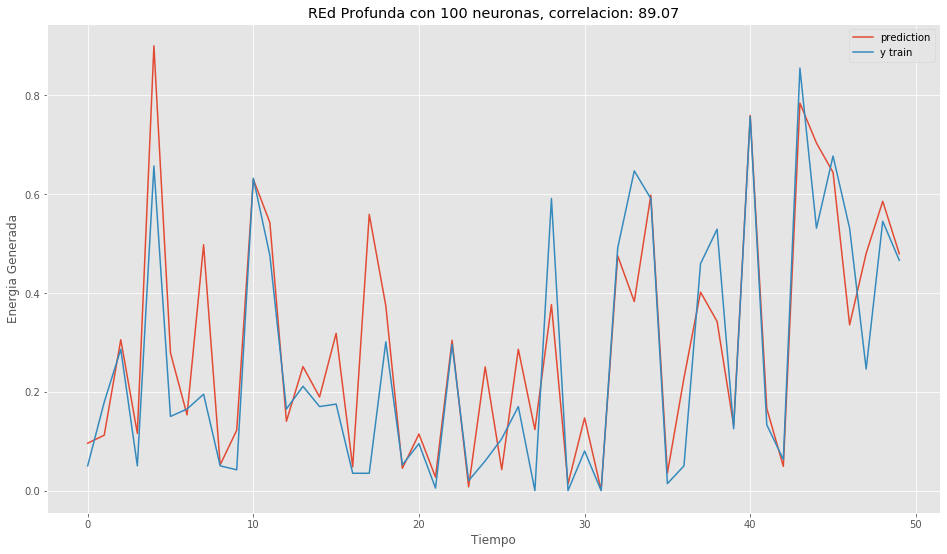

In [178]:
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]

plt.plot(pred_test_plot, label ="prediction")
plt.plot(y_test_plot, label ="y train")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("REd Profunda con %i neuronas, correlacion: %.2f" % (neuronas, corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Tiempo")
plt.legend()
plt.show()

In [179]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_binary_accuracy', 'val_mean_squared_error', 'loss', 'binary_accuracy', 'mean_squared_error'])


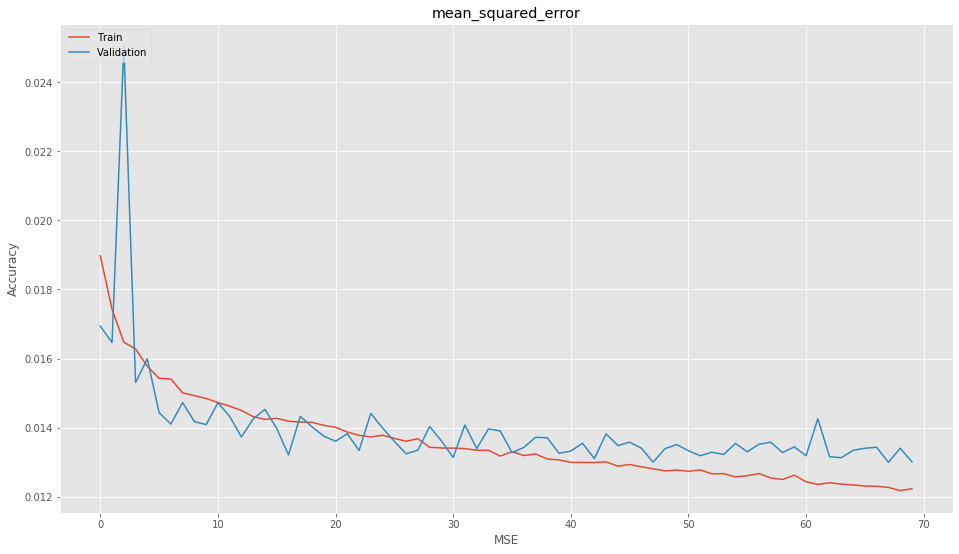

In [180]:
# Plot training & validation accuracy values
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('Accuracy')
plt.xlabel('MSE')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

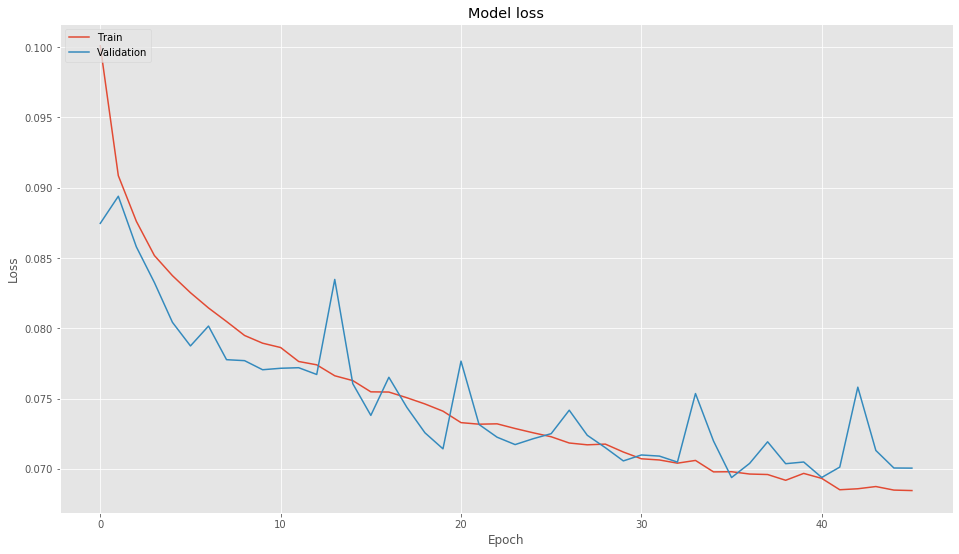

In [182]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
## Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por 13 ws (wind speed mph),
# según nuestro modelo, hacemos:

#y_12 = regr.predict([[12,70.4,2012,7]])
test= np.array([[3.66,106.24,2009,7]])
y_12 = model.predict(test)


print(y_12)

[[0.21484368]]


In [35]:

df_test = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/test_24.csv")
#veamos cuantas dimensiones y registros contiene

# Ver los 1ros registros
df_test.head()

,ws,wd,anno,mes
0,6.00,129.58,2009,7
1,5.95,129.18,2009,7
2,5.58,128.26,2009,7
3,5.02,126.75,2009,7
4,4.36,124.69,2009,7


In [36]:
df_test.describe()

,ws,wd,anno,mes
count,48.000000,48.000000,48.0,48.0
mean,5.201875,117.106667,2009.0,7.0
std,1.878959,9.265603,0.0,0.0
min,2.540000,100.850000,2009.0,7.0
25%,3.395000,110.390000,2009.0,7.0
50%,4.970000,117.195000,2009.0,7.0
75%,6.800000,123.850000,2009.0,7.0
max,8.700000,139.140000,2009.0,7.0


In [37]:
#x_test = df_test[:,1:5]
#y_train = dataset[:,5

In [38]:
df = df_test.values
x_test = df[:,0:4]

x_test

y_12 = model.predict(x_test)

print(y_12)

[[0.2876894 ]
 [0.28733653]
 [0.28382248]
 [0.278556  ]
 [0.27247322]
 [0.2669514 ]
 [0.26263934]
 [0.26079124]
 [0.26227742]
 [0.2674305 ]
 [0.27445564]
 [0.2807752 ]
 [0.28510275]
 [0.28837508]
 [0.2927746 ]
 [0.2991931 ]
 [0.306817  ]
 [0.31375518]
 [0.31832057]
 [0.31797013]
 [0.30955103]
 [0.29144642]
 [0.26939908]
 [0.25152948]
 [0.24679148]
 [0.25241008]
 [0.2605782 ]
 [0.265843  ]
 [0.26808086]
 [0.2676657 ]
 [0.26527187]
 [0.26369336]
 [0.26557082]
 [0.27277327]
 [0.28222504]
 [0.29117727]
 [0.29802597]
 [0.30386725]
 [0.308655  ]
 [0.31150702]
 [0.3131152 ]
 [0.3152927 ]
 [0.31865206]
 [0.31969678]
 [0.3134599 ]
 [0.29705384]
 [0.27641323]
 [0.2606102 ]]


### 

In [ ]:
## Gurdar regresión

In [49]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_iter1_deepNN.csv')
